# UMAP

In [1]:
%cd ..

/Users/steed/caliskan/git/learning-appearance-bias


In [2]:
import umap
import numpy as np
import matplotlib.style as style
import matplotlib.pyplot as plt
import seaborn as sns

def plot_umap(labels, features, name, label="Trustworthy", hue="Trustworthy", legend_abbrv=False, **umap_params):
    reducer = umap.UMAP(**umap_params)
    embedding = reducer.fit_transform(features)

    plot = sns.scatterplot(
        embedding[:, 0],
        embedding[:, 1],
        hue=labels[hue]
    )
    plot.set(title=f"2D UMAP Projection of {name}")
    l = plt.legend(frameon=True, title=hue)
    if legend_abbrv:
        l.remove()
    else:
        l.get_frame().set_facecolor('white')
    # remove axis labels
    frame = plt.gca()
    frame.axes.xaxis.set_ticklabels([])
    frame.axes.yaxis.set_ticklabels([])
    plot.get_figure().savefig(f"output/plots/umap_{label}_{name}.png", dpi=300, )

## Random Faces

In [3]:
import pandas as pd

features = pd.read_csv("output/features/features_random.tsv", sep="\t", index_col=0, header=None)
labels = pd.read_csv("output/features/meta_random.tsv", sep="\t", index_col=0)
random = labels.join(features)
random

,Face name,Attractive,Competent,Trustworthy,Dominant,Extroverted,1,2,3,4,...,119,120,121,122,123,124,125,126,127,128
0,f42887_e_000,-160.771803,-189.130004,-108.934578,-108.068665,-91.406618,-0.380226,-1.431551,0.869606,-0.530292,...,0.670084,0.097744,0.837177,-1.550338,0.155964,0.467207,0.213982,0.714511,0.059549,-1.337308
1,f42887_e_001,85.870366,46.524243,8.026019,-4.789065,30.063076,-1.685255,-0.158518,-1.148825,-0.067581,...,-0.896759,1.288445,0.813866,-0.984678,0.079021,-1.220563,-0.585342,-0.909572,-0.171986,-0.991142
2,f42887_e_002,62.219747,106.267573,95.746466,94.654938,134.182001,-0.903652,1.091634,-1.224763,0.535420,...,0.145848,1.864644,1.426301,-0.660113,1.566592,-0.941579,-0.740110,-1.352450,-0.007981,0.487337
3,f42887_e_003,-79.683967,-23.176309,-69.947712,71.702938,-43.677690,0.204740,0.086893,-0.833269,-0.283875,...,-1.025101,2.024632,1.454720,-0.491679,0.687227,0.215850,-0.447395,0.113906,0.368140,-0.013623
4,f42887_e_004,62.219747,66.438686,27.519452,159.675340,73.439996,0.049952,0.572150,-1.494279,0.281189,...,-1.249717,1.339700,0.719648,-0.375288,2.324325,-0.237870,-0.742331,-0.235744,0.709733,1.025752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,f42887_e_295,4.782529,96.310351,232.200495,-4.789065,134.182001,-0.508703,-0.661403,-1.154081,-0.292548,...,-0.237843,1.782155,0.891956,-0.858784,1.069805,0.169226,-0.474968,0.081520,0.623646,0.226047
296,f42887_e_296,-147.257164,-129.386674,56.759601,-127.185067,138.519693,-0.668938,-1.679210,0.978853,-1.097918,...,0.719690,-0.382280,1.561750,-1.635764,0.537545,0.518705,0.248133,-0.365679,0.215940,-0.919817
297,f42887_e_297,-66.169328,16.652577,42.139526,41.106137,51.751536,-0.371703,-1.496342,-1.318696,0.288417,...,-0.615165,1.482318,1.501913,-1.845295,1.296250,-0.489450,0.268822,0.805567,0.889982,-0.644699
298,f42887_e_298,55.462427,53.162390,-35.834205,75.529738,-4.638461,-1.138516,-0.554175,-1.560489,0.401353,...,-0.136302,1.431544,0.894669,-1.293318,1.266968,-0.084333,-1.153480,-0.253283,0.252753,-0.442716


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


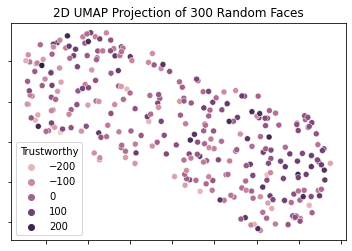

In [4]:
plot_umap(labels, features, "300 Random Faces", n_neighbors=15, min_dist=0.1, n_components=2)

## Max Distinct Faces

In [5]:
import pandas as pd

features = pd.read_csv("output/features/features_all.tsv", sep="\t", index_col=0, header=None)
labels = pd.read_csv("output/features/meta_all.tsv", sep="\t", index_col=0)
labels["Score"] = labels["Face name"].str.split("_").str[-1].astype(int)
labels["Trait"] = labels["Face name"].str.split("_").str[1].str.split(" ").str[0]
labels["FaceID"] = labels["Face name"].str.split("_").str[0]
labels

,Face name,Score,Trait,FaceID
0,EastAsian25_Likeable (300 faces)_+125,125,Likeable,EastAsian25
1,EastAsian01_Likeable (300 faces)_+025,25,Likeable,EastAsian01
2,EastAsian03_Likeable (300 faces)_-200,-200,Likeable,EastAsian03
3,EastAsian13_Likeable (300 faces)_-100,-100,Likeable,EastAsian13
4,EastAsian12_Likeable (300 faces)_-175,-175,Likeable,EastAsian12
...,...,...,...,...
13120,Black22_Competence_0000,0,Competence,Black22
13121,Black21_Competence_+250,250,Competence,Black21
13122,Black22_Competence_+050,50,Competence,Black22
13123,Black03_Competence_-075,-75,Competence,Black03


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


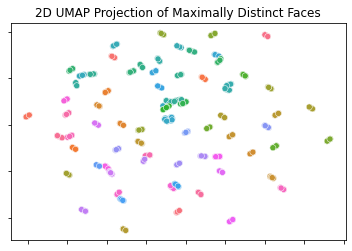

In [6]:
plot_umap(
    labels[labels.Trait == "Trustworthiness"], 
    features[labels.Trait == "Trustworthiness"], 
    "Maximally Distinct Faces",
    hue="FaceID",
    legend_abbrv=True,
    n_neighbors=15, 
    min_dist=0.1, 
    n_components=2
)

In [12]:
labels[labels.Trait == "Trustworthiness"].FaceID.count()

1875